<a href="https://colab.research.google.com/github/elsbethcodes/data-portfolio/blob/main/heart-disease/heart_disease_stats_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Health Factors Linked to Heart Disease

## Introduction
This notebook analyses patient information related to heart disease using statistical tests including T-tests, ANOVA & Tukey, and Chi-Square.

The aim is to identify related health factors and study whether there is a significant difference present between those with heart disease and those without.

## Exploration of Dataset

In [ ]:
# import libraries
import pandas as pd # data handling
import numpy as np # mathematical structures
import matplotlib.pyplot as plt # visualisations
import seaborn as sns # visualisations

sns.set_palette("Set2") # set colour scheme for notebook

from scipy.stats import ttest_ind # Two Sample T-Test (for independent groups)
from scipy.stats import f_oneway # ANOVA Test (analysis of variance)
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Pairwise Tukey Test
from scipy.stats import chi2_contingency # Chi-Square Test

In [ ]:
# load dataset
url = 'https://raw.githubusercontent.com/elsbethcodes/data-portfolio/refs/heads/main/heart-disease/heart_disease.csv'
heart = pd.read_csv(url)

In [ ]:
# find information about column names, number of rows, null values, datatypes, etc.
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            303 non-null    int64 
 1   sex            303 non-null    object
 2   trestbps       303 non-null    int64 
 3   chol           303 non-null    int64 
 4   cp             303 non-null    object
 5   exang          303 non-null    int64 
 6   fbs            303 non-null    int64 
 7   thalach        303 non-null    int64 
 8   heart_disease  303 non-null    object
dtypes: int64(6), object(3)
memory usage: 21.4+ KB
None


This dataset describes 303 patients with all information present for every patient.

The target variable in this analysis is heart_disease which is either 'presence' or 'absence' depending on whether the patient has heart disease or not.

In [ ]:
# view the first 5 rows
print(heart.head())

   age     sex  trestbps  chol                cp  exang  fbs  thalach  \
0   63    male       145   233    typical angina      0    1      150   
1   67    male       160   286      asymptomatic      1    0      108   
2   67    male       120   229      asymptomatic      1    0      129   
3   37    male       130   250  non-anginal pain      0    0      187   
4   41  female       130   204   atypical angina      0    0      172   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  


We can see above the variables to be investigated in relation to heart_disease, which are as follows:

| Variable   | Description | Units |
|------------|-------------|-------|
| age        | Age | years |
| sex        | Sex assigned at birth (male or female) | - |
| trestbps   | Resting blood pressure | mm Hg |
| chol       | Serum cholesterol | mg/dl |
| cp         | Chest pain type | - |
| exang      | Exercise-induced angina (1 = yes, 0 = no)  | - |
| fbs        | Fasting blood sugar > 120 mg/dl (1 = yes, 0 = no)  | - |
| thalach    | Maximum heart rate achieved during exercise | bpm |

Below is a pairplot which shows a KDE plot of each quantitative variable on the diagonal and a scatter plot of each quantitative variable against the others on the non-diagonal.

A KDE plot is a histogram with smoothing so the height of the curve at a point x is proportional to the estimated probability density there.

Each graph is grouped by whether heart disease is present or not (orange = presence, green = absence).

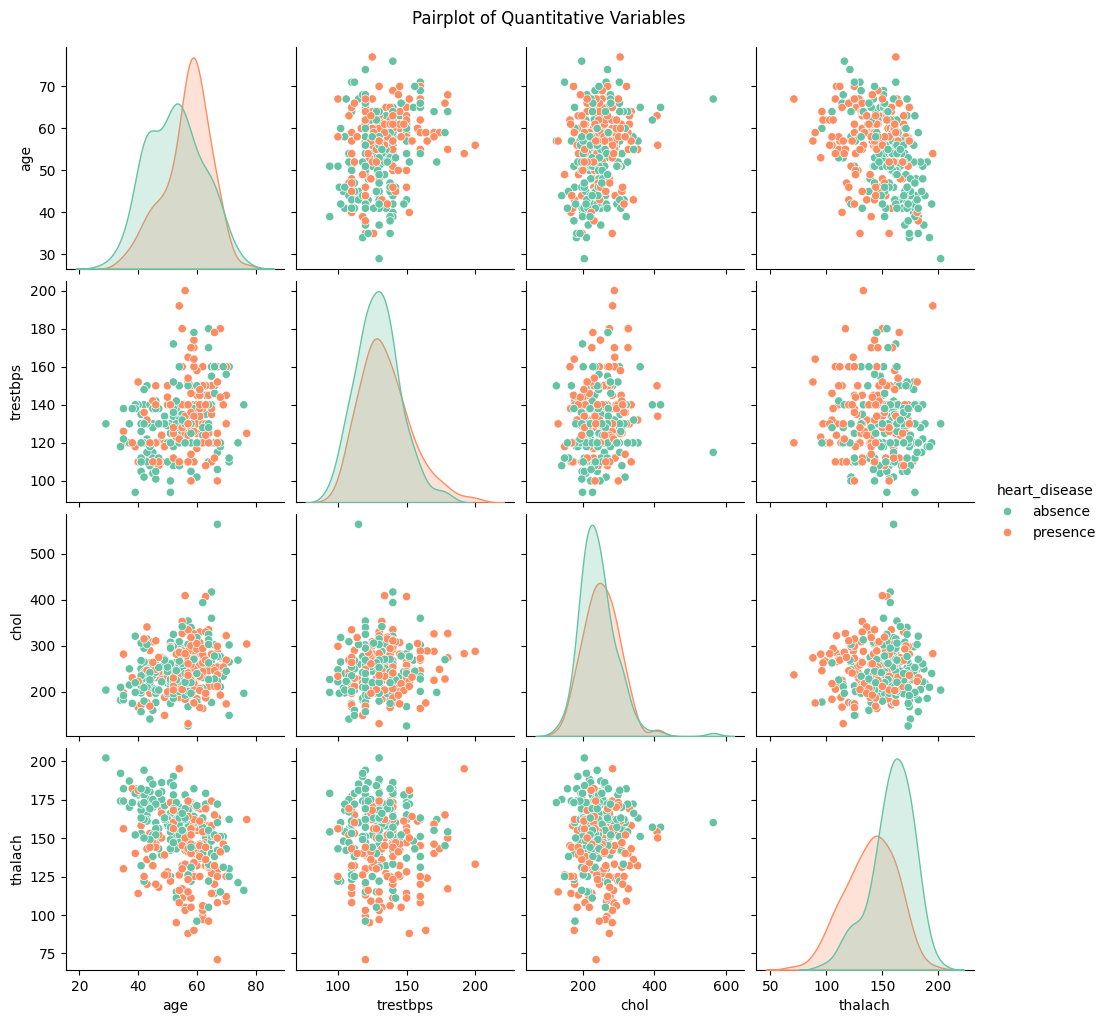

In [ ]:
ax = sns.pairplot(vars=['age', 'trestbps', 'chol', 'thalach'], hue='heart_disease', data=heart)
ax.fig.suptitle("Pairplot of Quantitative Variables",  y=1.02)
plt.show()

The scatterplots begin to show some trends, for example resting blood pressure (trestbps) is positively correlated with age whereas maximum heartrate achieved during exercise (thalach) is negatively correlated with age. We can also see clearly that maximum heartrate achieved during exercise (thalach) is lower in cases of heart disease (heart_disease).

Boxplots will help to show more insights that are obscured on the scatter plots.

## Maximum Heart Rate Achieved During Exercise

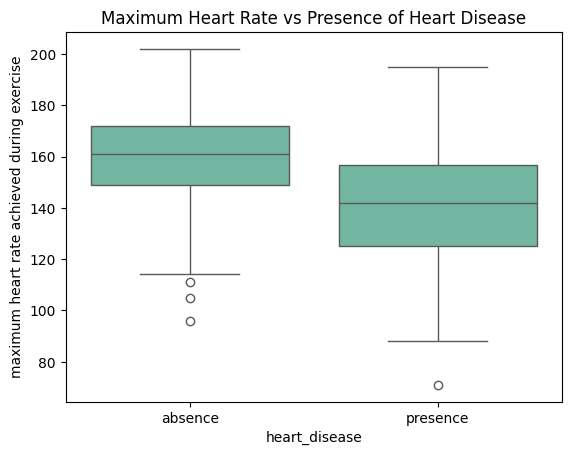

<Figure size 640x480 with 0 Axes>

In [ ]:
# boxplot for visual comparison of groups with heart disease vs without heart disease for the variable thalach
sns.boxplot(x='heart_disease', y='thalach', data=heart)
plt.ylabel('maximum heart rate achieved during exercise')
plt.title('Maximum Heart Rate vs Presence of Heart Disease')
plt.show()
plt.clf()

The above boxplot shows that those with heart disease have a lower maximum heart rate achieved during exercise on average than those without heart disease.

In [ ]:
# create groups
max_heart_rate_hd = heart['thalach'][heart['heart_disease']=='presence'] # group with heart disease
max_heart_rate_no_hd = heart['thalach'][heart['heart_disease']=='absence'] # group without heart disease

# check size of each group
print(f'Patients WITH heart disease in dataset: {len(max_heart_rate_hd)}')
print(f'Patients WITHOUT heart disease in dataset: {len(max_heart_rate_no_hd)}')

Patients WITH heart disease in dataset: 139
Patients WITHOUT heart disease in dataset: 164


In [ ]:
# comparison of averages
mean_diff = np.mean(max_heart_rate_no_hd) - np.mean(max_heart_rate_hd)
median_diff = np.median(max_heart_rate_no_hd) - np.median(max_heart_rate_hd)
print(f'The group with heart disease differs in maximum heart rate to the group without heart disease by mean {round(mean_diff,1)} and median {round(median_diff,1)}.')

The group with heart disease differs in maximum heart rate to the group without heart disease by mean 19.1 and median 19.0.


Does the group with heart disease differ significantly in maximum heart rate achieved during exercise to the group without heart disease at the 5% significance level?

Since we are comparing the averages of two groups to see if they are different, a two-tailed T-test is appropriate.

The pairplot above showed that each group is roughly normally distributed (see in more detail on the histograms below) and since each group has a sample size much larger than 30, a T-test should be robust to minor deviations from normality.

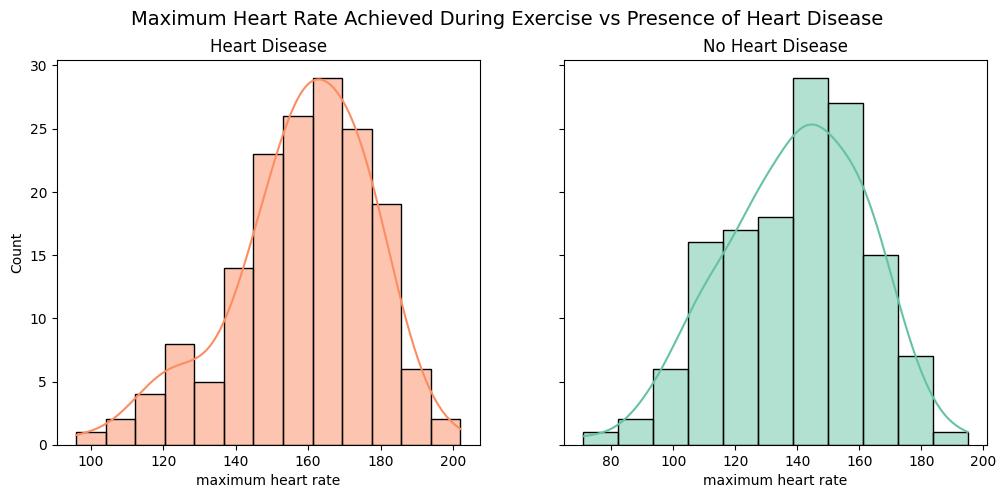

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create figures of two side-by-side plots with a shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Subset data by heart_disease status
hd = heart[heart['heart_disease'] == 'presence']
no_hd = heart[heart['heart_disease'] == 'absence']

# Heart disease plot
sns.histplot(data=hd, x='thalach', ax=axes[1], kde=True, color='#66c2a5')
axes[0].set_title('Heart Disease')
axes[0].set_xlabel('maximum heart rate')

# No heart disease plot
sns.histplot(data=no_hd, x='thalach', ax=axes[0], kde=True, color='#fc8d62')
axes[1].set_title('No Heart Disease')
axes[1].set_xlabel('maximum heart rate')

fig.suptitle('Maximum Heart Rate Achieved During Exercise vs Presence of Heart Disease', fontsize=14)

plt.show()

In [ ]:
# Two sample t-test (two-tailed)
# Null Hypothesis: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
# Alternative Hypothesis: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.

tval, pval = ttest_ind(max_heart_rate_hd, max_heart_rate_no_hd)
print(f'T-test p-value: {pval}.')
if pval < 0.05:
  print('Conclusion: There is SIGNIFICANT evidence that the average thalach for a person with heart disease is NOT equal to the average thalach for a person with heart disease.')
  # Reject Null Hypothesis
else:
  print('Conclusion: There is INSIGNIFICANT evidence that the average thalach for a person with heart disease is NOT equal to the average thalach for a person with heart disease.')
  # Accept Null Hypothesis

T-test p-value: 3.456964908430172e-14.
Conclusion: There is SIGNIFICANT evidence that the average thalach for a person with heart disease is NOT equal to the average thalach for a person with heart disease.


We can do a similar investigation for age vs presence of heart disease.

## Age

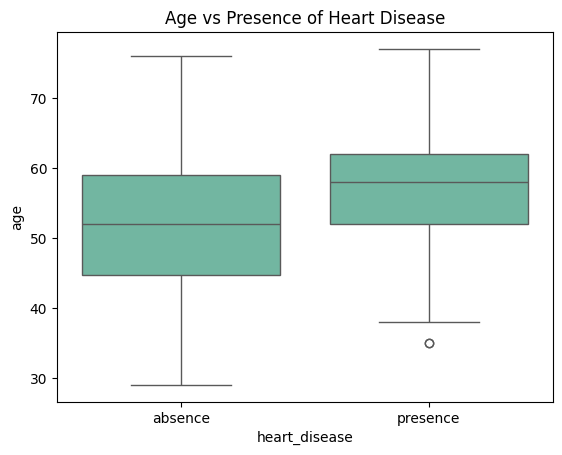

<Figure size 640x480 with 0 Axes>

In [ ]:
# boxplot for visual comparison
sns.boxplot(x='heart_disease', y='age', data=heart)
plt.title('Age vs Presence of Heart Disease')
plt.show()
plt.clf()

The above boxplot shows that patients with heart disease have a higher age on average than those who do not.

In [ ]:
# create subgroups
age_hd = heart['age'][heart['heart_disease']=='presence']
age_no_hd = heart['age'][heart['heart_disease']=='absence']

In [ ]:
# comparison of averages
mean_diff = np.mean(age_hd) - np.mean(age_no_hd)
median_diff = np.median(age_hd) - np.median(age_no_hd)
print(f'The group with heart disease differs in age to the group without heart disease by mean {round(mean_diff,1)} years and median {round(median_diff,1)} years.')

The group with heart disease differs in age to the group without heart disease by mean 4.0 years and median 6.0 years.


Is this difference significant at the 5% signficance level?

Test normality assumption for age.

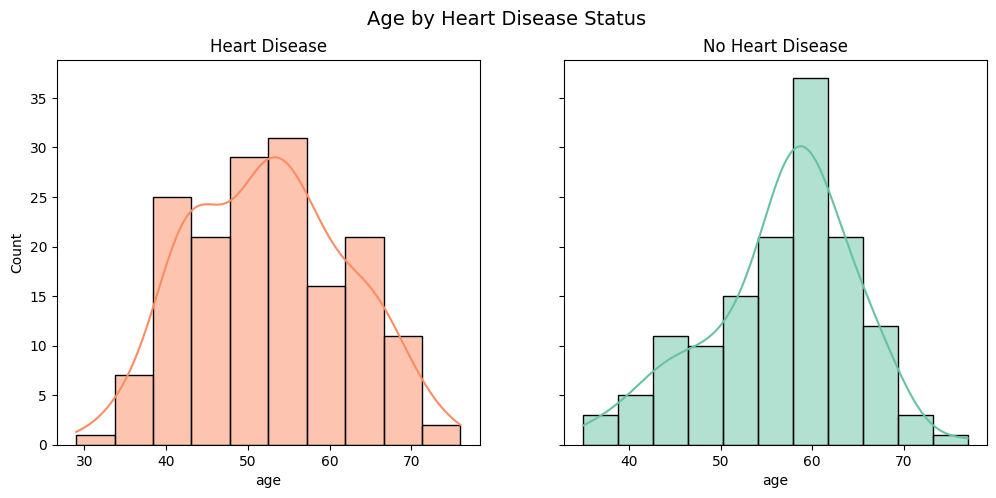

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create figures of two side-by-side plots with a shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Heart disease plot
sns.histplot(data=hd, x='age', ax=axes[1], kde=True, color='#66c2a5')
axes[0].set_title('Heart Disease')

# No heart disease plot
sns.histplot(data=no_hd, x='age', ax=axes[0], kde=True, color='#fc8d62')
axes[1].set_title('No Heart Disease')

fig.suptitle('Age by Heart Disease Status', fontsize=14)

plt.show()

Normality assumption fails for the heart disease group, however T-Test should still be robust for large sample sizes (heart disease group is made up of 139 patients).

In [ ]:
# Two sample t-test to test the following hypotheses:
# Null Hypothesis: The average age for a person with heart disease is equal to the average age for a person without heart disease.
# Alternative Hypothesis: The average age for a person with heart disease is NOT equal to the average age for a person without heart disease.
tval, pval = ttest_ind(age_hd, age_no_hd)
print(f'T-test p-value: {pval}.')
if pval < 0.05:
  print('Conclusion: There is SIGNIFICANT evidence that the average age for a person with heart disease is NOT equal to the average age for a person with heart disease.')
else:
  print('Conclusion: There is INSIGNIFICANT evidence that the average age for a person with heart disease is NOT equal to the average age for a person with heart disease.')

T-test p-value: 8.955636917529706e-05.
Conclusion: There is SIGNIFICANT evidence that the average age for a person with heart disease is NOT equal to the average age for a person with heart disease.


So far we've used T-tests to learn that there are statistically significant differences in age and maximum heart rate achieved during exercise depending on presence of heart disease to a 5% significance level (actual significance levels 3.46e-14 and 8.96e-05).

We can test for association of categorical variables like chest pain using a Chi-Square test instead.

## Chest pain type

In [ ]:
# prepare contingency table for chi-square test
Xtab = pd.crosstab(heart['cp'], heart['heart_disease'])
print(Xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


In [ ]:
# chi-square can compare two categorical variables, given a contingency table
chi2, pval, dof, exp = chi2_contingency(Xtab)
print(f'Chi-Square Test p-value: {pval}.')
if pval < 0.05:
  print('Conclusion: There is statistically SIGNIFICANT evidence that there is an association between chest pain type and whether or not someone is diagnosed with heart disease.')
else:
  print('Conclusion: There is NOT statistically significant evidence that there is an association between chest pain type and whether or not someone is diagnosed with heart disease.')

Chi-Square Test p-value: 1.2517106007837527e-17.
Conclusion: There is statistically SIGNIFICANT evidence that there is an association between chest pain type and whether or not someone is diagnosed with heart disease.


Now we know that chest pain is associated with diagnosis of heart disease, we may also be interested in whether heart rate can predict which symptoms someone with heart disease is likely to experience.

This information could help raise awareness of symptoms.

We can begin by visualising different chest pain groups against maximum heart rate with a boxplot.

## Chest Pain Type vs Maximum Heart Rate Achieved During Exercise

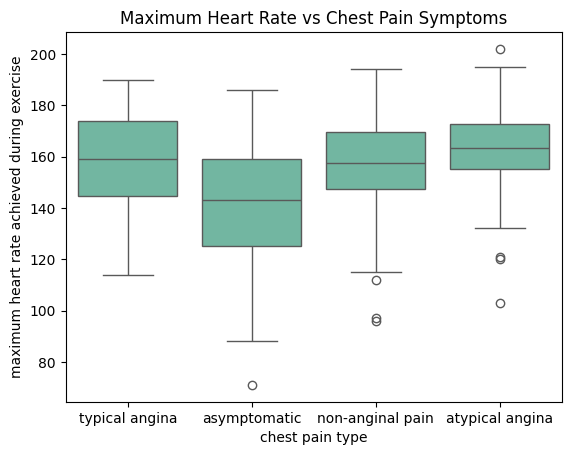

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.boxplot(x='cp', y='thalach', data=heart)
plt.title('Maximum Heart Rate vs Chest Pain Symptoms')
plt.xlabel('chest pain type')
plt.ylabel('maximum heart rate achieved during exercise')
plt.show()
plt.clf()

This shows that people with the asymptomatic case of heart disease tend to have a lower maximum heart rate on average.

Is this difference statistically significant?

In [ ]:
# create subgroups
thalach_typical = heart['thalach'][heart['cp']=='typical angina']
thalach_asymptom = heart['thalach'][heart['cp']=='asymptomatic']
thalach_nonangin = heart['thalach'][heart['cp']=='non-anginal pain']
thalach_atypical = heart['thalach'][heart['cp']=='atypical angina']

In [ ]:
# ANOVA test to compare two or more means (type 1 error limited to 5%)
# Null Hypothesis: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
# Alternative Hypothesis: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.
fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print(f'ANOVA test p-value: {pval}')
if pval < 0.05:
  print('Conclusion: There is at least one pair of chest pain categories for which people have statistically significantly different maximum heart rates.')
else:
  print('Conclusion: No pair of chest pain categories has statistically significantly different maximum heart rates.')

ANOVA test p-value: 1.9065505247705008e-10
Conclusion: There is at least one pair of chest pain categories for which people have statistically significantly different maximum heart rates.


In [ ]:
# Tukey-test - which pairs are significantly different?
result = pairwise_tukeyhsd(endog = heart['thalach'], groups = heart['cp'], alpha=0.05)
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


The pairs of chest pain categories that differ significantly in terms of maximum heart rate achieved during exercise are asymptomatic & atypical angina, asymptomatic & non-anginal pain, and asymptomatic & typical angina.

So YES, maximum heart rate for asymptomatic cases of chest pain do differ significantly from all other categories.

We can conclude that asymptomatic cases of chest pain are more likely for patients with a higher maximum heart rate.

# Thank you
Thank you for reading my analysis. Please note that although this dataset contains real patient data, this project has been performed for learning purposes therefore conclusions should not be used to inform real health decisions.